In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# from utils.pixel import *

os.chdir(r"/home/lukas/Documents/ETH/MASTER_THESIS/code")

In [2]:
WW = True  # only consider 'Winter Wheat' otherwise consider Cereals

if WW:
    path_cov = os.path.join("data/yieldmapping_data", "WW_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "WW_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "WW_yield_tot.csv")
else:
    path_cov = os.path.join("data/yieldmapping_data",
                            "Cereals_covariates_tot.csv")
    path_met = os.path.join("data/yieldmapping_data", "Cereals_meteo_tot.csv")
    path_yie = os.path.join("data/yieldmapping_data", "Cereals_yield_tot.csv")

d_cov = pd.read_csv(path_cov)
d_met = pd.read_csv(path_met)
d_yie = pd.read_csv(path_yie)

In [91]:
import pandas as pd
import matplotlib.pyplot as plt


class pixel:
    def __init__(self, coord_id, d_cov, d_met, d_yie):
        self.coord_id = coord_id
        self.cov = d_cov[d_cov.coord_id == coord_id]
        self.yie = d_yie[d_yie.coord_id == coord_id]
        self.FID = self.cov.FID  # can take instead: set(...)
        self.met = d_met[d_met.FID.isin(set(self.FID))]

    # printing method:
    def __str__(self):
        return "FID:  " + str(set(self.FID)) + "--------------------------" + "\n" + "yield: " + str(self.yie) + "\n" + "coord_id: " + self.coord_id + "\n"

    def __repr__(self):
        return self.__str__()

    def get_ndvi(self):
        # NDVI := NIR(Band8)-Red(Band4)/NIR(Band8)+Red(Band4)
        if not hasattr(self, 'ndvi'):
            self.ndvi = (self.cov.B08 - self.cov.B04) / (self.cov.B08 + self.cov.B04)
        return self.ndvi

    def plot_ndvi(self):
        if not hasattr(self, 'ndvi'):
            self.get_ndvi()
        plt.scatter(self.cov.date, self.ndvi)
        plt.ylabel("NDVI")
        plt.ylim([0, 1])
        plt.xlabel("date")
        plt.show()


def random_pixel(d_cov, d_met, d_yie, n=1):
    result = []
    cid = d_cov.coord_id.to_frame().sample(n, ignore_index=True).coord_id
    for i in range(n):
        result.append(pixel(cid[i], d_cov, d_met, d_yie))
    return result


In [88]:
temp = random_pixel(d_cov, d_met, d_yie, n=2)[0]

35844     0.668293
36587     0.578707
37458     0.706434
38344     0.718439
39631     0.699192
40521     0.782950
41411     0.745564
42876     0.761167
43766     0.762457
44656     0.722107
45546     0.655629
46582     0.281553
47472     0.243687
310518    0.121439
312664    0.164384
314819    0.184744
316974    0.196552
319129    0.240506
321284    0.294659
323439    0.248677
325586    0.387342
327731    0.674620
329872    0.758733
332035    0.868297
334190    0.804199
336319    0.869876
337641    0.488239
339667    0.350318
dtype: float64


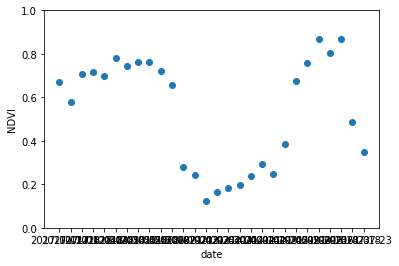

In [92]:


temp.get_ndvi()
print(temp.ndvi)
temp.get_ndvi()
temp.plot_ndvi()
